In [1]:
import matplotlib.pyplot as plt
import numpy as np
from stretchdyn.atoms_bonds import Atom, Bond, Molecule

## Quantitative Comparison

For a quantitative comparison to the real molecule, let's inspect one period of oscillation.

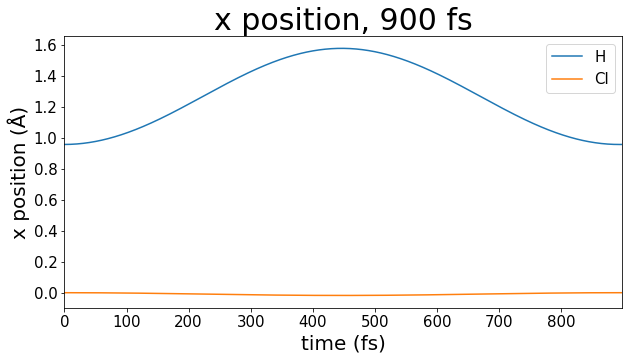

In [2]:
period = 900  # fs
r_e_ab = 1.27455  # angstroms
k_ab = 4.8e-5  # N / m
cl = Atom(mass_amu=35, symbol="Cl", pos=np.zeros(3), vel=np.zeros(3), prev_accel=np.zeros(3))
h = Atom(mass_amu=1, symbol="H", pos=np.array([r_e_ab * 0.75, 0.0, 0.0]), vel=np.zeros(3), prev_accel=np.zeros(3))
bond_cl_h = Bond(atom_a=cl, atom_b=h, r_e_ab=r_e_ab, k_ab=k_ab)
bond_h_cl = Bond(atom_a=h, atom_b=cl, r_e_ab=r_e_ab, k_ab=k_ab)
cl.bonds["h"] = bond_h_cl
h.bonds["cl"] = bond_cl_h
molecule = Molecule(atoms={"h": h, "cl": cl})
xs = range(period)
for _ in xs:
    molecule.update_all_atoms()
h_pos_history_x = [pos[0] for pos in h.pos_history]
cl_pos_history_x = [pos[0] for pos in cl.pos_history]
fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize=(10, 5))
ax.plot(xs, h_pos_history_x, label="H")
ax.plot(xs, cl_pos_history_x, label="Cl")
ax.set_xlim(0, max(xs))
ax.set_ylabel("x position (Å)", fontsize=20)
ax.set_xlabel("time (fs)", fontsize=20)
ax.set_title(f"x position, {period} fs", fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.legend(fontsize=15)

According to the model with the period of 900 fs, the frequency is \\(1.11 \times 10^{13} s^{-1}\\)

The real vibrational frequency of HCl, according to [Hyperphysics](http://hyperphysics.phy-astr.gsu.edu/hbase/molecule/vibrot.html#c2) is \\(8.66 \times 10^{13} s^{-1}\\)

The model's calculation of the vibrational frequency is not the same, but it is within the same order of magnitude :(

But, looking at more periods of oscillations, there is some good news.

## Qualitative comparison

The Cl atom is much more massive than the H atom. Therefore, the amplitude of the H atom's oscillations is greater than the amplitude of the Cl atom's osciallations.

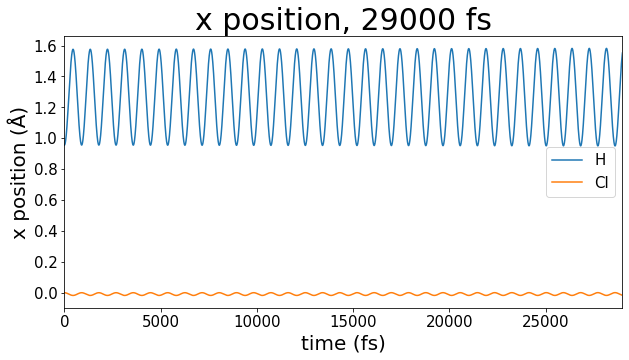

In [7]:
period = 29000  # fs
r_e_ab = 1.27455  # angstroms
k_ab = 4.8e-5  # N / m
cl = Atom(mass_amu=35, symbol="Cl", pos=np.zeros(3), vel=np.zeros(3), prev_accel=np.zeros(3))
h = Atom(mass_amu=1, symbol="H", pos=np.array([r_e_ab * 0.75, 0.0, 0.0]), vel=np.zeros(3), prev_accel=np.zeros(3))
bond_cl_h = Bond(atom_a=cl, atom_b=h, r_e_ab=r_e_ab, k_ab=k_ab)
bond_h_cl = Bond(atom_a=h, atom_b=cl, r_e_ab=r_e_ab, k_ab=k_ab)
cl.bonds["h"] = bond_h_cl
h.bonds["cl"] = bond_cl_h
molecule = Molecule(atoms={"h": h, "cl": cl})
xs = range(period)
for _ in xs:
    molecule.update_all_atoms()
h_pos_history_x = [pos[0] for pos in h.pos_history]
cl_pos_history_x = [pos[0] for pos in cl.pos_history]
fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize=(10, 5))
ax.plot(xs, h_pos_history_x, label="H")
ax.plot(xs, cl_pos_history_x, label="Cl")
ax.set_xlim(0, max(xs))
ax.set_ylabel("x position (Å)", fontsize=20)
ax.set_xlabel("time (fs)", fontsize=20)
ax.set_title(f"x position, {period} fs", fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.legend(fontsize=15)